# Analysis on The Relation Between The Rise of Korean Wave (Hallyu) in Thailand and Thai People’s Attitude and Tendency in Visiting South Korea

------------

Import some useful libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

Export the collected data from __[Google Docs](https://docs.google.com/forms/d/e/1FAIpQLSczee1CkfgpVCRRgNr0sqGynRP1Kx5YiYjGvZXPotc7tH9NXw/viewform)__

then save to .csv file and finally import to this jupyter notebook 

In [2]:
data = pd.read_csv('data.csv')

------------

## Data Cleansing

Check the data columns

In [3]:
data.columns

Index(['Timestamp', '1. Age อายุ', '2. Gender เพศ', '3. Residence ถิ่นที่อยู่',
       '4. Have you ever consumed any Korean media products, as follows? คุณเคยบริโภคสื่อบันเทิงจากประเทศเกาหลีใต้ข้างต้นหรือไม่? [Korean dramas ซีรีส์เกาหลี]',
       '4. Have you ever consumed any Korean media products, as follows? คุณเคยบริโภคสื่อบันเทิงจากประเทศเกาหลีใต้ข้างต้นหรือไม่? [Korean songs เพลงเกาหลี]',
       '4. Have you ever consumed any Korean media products, as follows? คุณเคยบริโภคสื่อบันเทิงจากประเทศเกาหลีใต้ข้างต้นหรือไม่? [Korean films ภาพยนตร์เกาหลี]',
       '5. How long have you been exposed to Korean Wave? (Please provide your answer in the unit of month or year) คุณได้รู้จัก/คุ้นเคยกับกระแสนิยมเกาหลีเป็นเวลานานเท่าไรแล้ว? (กรุณาระบุช่วงเวลาเป็นเดือนหรือปี)',
       '6. Do you enjoy Korean media products? คุณชื่นชอบสื่อบันเทิงจากประเทศเกาหลีใต้หรือไม่?',
       '7. If you enjoy Korean media products, then how often do you consume Korean media products in a typical week? คุณบริโภคส

In [4]:
data.columns = ['Timestamp', 'Age', 'Gender', 'Residence', \
                'Have you ever consumed any Korean Dramas?', \
                'Have you ever consumed any Korean Songs?', \
                'Have you ever consumed any Korean Films?', \
                'How long have you been exposed to Korean Wave?', \
                'Do you enjoy Korean media products?', \
                'How often do you consume Korean media products in a typical week?', \
                'Enjoy Korean media products because I like the products', \
                'Enjoy Korean media products because the products are popular among the peers', \
                'Enjoy Korean media products because my friends recommended', \
                'Enjoy Korean media products for time-killing purpose', \
                'Enjoy Korean media products because I like to learn Korean language', \
                'Enjoy Korean media products because I want to know about Korean society and culture', \
                'How much are you satisfied with the quality of Korean media products?', \
                'When you think about South Korea, how do you feel?', \
                'Imagine that you meet a South Korean. In your mind, how is the South Korean?', \
                'Have you ever visited South Korea before?', \
                'If YES, do you want to re-visit South Korea again?', \
                'If NO, have you ever planned to visit South Korea in the future?', \
                'How many Korean friends do you have?', \
                'Can you speak some Korean words?', \
                'If YES, how proficient is your Korean?']

In [5]:
data.columns

Index(['Timestamp', 'Age', 'Gender', 'Residence',
       'Have you ever consumed any Korean Dramas?',
       'Have you ever consumed any Korean Songs?',
       'Have you ever consumed any Korean Films?',
       'How long have you been exposed to Korean Wave?',
       'Do you enjoy Korean media products?',
       'How often do you consume Korean media products in a typical week?',
       'Enjoy Korean media products because I like the products',
       'Enjoy Korean media products because the products are popular among the peers',
       'Enjoy Korean media products because my friends recommended',
       'Enjoy Korean media products for time-killing purpose',
       'Enjoy Korean media products because I like to learn Korean language',
       'Enjoy Korean media products because I want to know about Korean society and culture',
       'How much are you satisfied with the quality of Korean media products?',
       'When you think about South Korea, how do you feel?',
       'Imagine tha

In [6]:
data.drop(['Timestamp', 'How long have you been exposed to Korean Wave?',\
           'When you think about South Korea, how do you feel?',\
           'How many Korean friends do you have?',\
           'Can you speak some Korean words?',\
           'If YES, how proficient is your Korean?'], axis=1, inplace=True)

In [7]:
data.head(4)

,Age,Gender,Residence,Have you ever consumed any Korean Dramas?,Have you ever consumed any Korean Songs?,Have you ever consumed any Korean Films?,Do you enjoy Korean media products?,How often do you consume Korean media products in a typical week?,Enjoy Korean media products because I like the products,Enjoy Korean media products because the products are popular among the peers,Enjoy Korean media products because my friends recommended,Enjoy Korean media products for time-killing purpose,Enjoy Korean media products because I like to learn Korean language,Enjoy Korean media products because I want to know about Korean society and culture,How much are you satisfied with the quality of Korean media products?,"Imagine that you meet a South Korean. In your mind, how is the South Korean?",Have you ever visited South Korea before?,"If YES, do you want to re-visit South Korea again?","If NO, have you ever planned to visit South Korea in the future?"
0,21,Female หญิง,Bangkok กรุงเทพมหานคร,Yes ใช่,Yes ใช่,Yes ใช่,Yes ชอบ,Everyday ทุกวัน,Agree เห็นด้วย,Agree เห็นด้วย,Agree เห็นด้วย,Agree เห็นด้วย,Agree เห็นด้วย,Neither disagree nor agree กลางๆ,Satisfied พอใจ,Just a person เป็นเพียงคนๆหนึ่ง,Yes เคย,Yes อยาก,NaN
1,54,Female หญิง,Bangkok กรุงเทพมหานคร,Yes ใช่,Yes ใช่,Yes ใช่,Yes ชอบ,One day per week 1 วันต่อสัปดาห์,Agree เห็นด้วย,Agree เห็นด้วย,Agree เห็นด้วย,Disagree ไม่เห็นด้วย,Disagree ไม่เห็นด้วย,Neither disagree nor agree กลางๆ,Satisfied พอใจ,Just a person เป็นเพียงคนๆหนึ่ง,Yes เคย,Yes อยาก,Yes อยาก
2,22,Female หญิง,Bangkok กรุงเทพมหานคร,Yes ใช่,Yes ใช่,Yes ใช่,Yes ชอบ,Everyday ทุกวัน,Neither disagree nor agree กลางๆ,Neither disagree nor agree กลางๆ,Neither disagree nor agree กลางๆ,Neither disagree nor agree กลางๆ,Neither disagree nor agree กลางๆ,Neither disagree nor agree กลางๆ,Neither satisfied nor dissatisfied ปานกลาง,Just a person เป็นเพียงคนๆหนึ่ง,Yes เคย,Yes อยาก,Yes อยาก
3,19,Female หญิง,Other cities ต่างจังหวัด,Yes ใช่,Yes ใช่,Yes ใช่,Yes ชอบ,Three days per week 3 วันต่อสัปดาห์,Agree เห็นด้วย,Neither disagree nor agree กลางๆ,Neither disagree nor agree กลางๆ,Agree เห็นด้วย,Agree เห็นด้วย,Agree เห็นด้วย,Satisfied พอใจ,Good person เป็นคนดี,Yes เคย,Yes อยาก,Yes อยาก


In [8]:
for n in range (len(data.columns)) :
    if data[data.columns[n]].isnull().sum() == 0 :
        if len(data.iloc[0, n].split(' ')) > 1 :
            data[data.columns[n]] = [data.iloc[i, n].split(' ')[: -1] for i, j in enumerate(data[data.columns[n]])]
            data[data.columns[n]] = [' '.join(data.iloc[i, n]).strip() for i, j in enumerate(data[data.columns[n]])]

In [9]:
data['Age']

0         21
1         54
2         22
3         19
4         22
5         21
6         22
7         44
8         50
9         32
10        29
11        27
12        25
13        22
14        36
15        41
16        33
17        24
18        56
19        37
20        22
21        21
22        34
23        21
24        22
25        23
26     47 ปี
27        22
28        23
29        21
       ...  
247       30
248       34
249       21
250    54 ปี
251       61
252       19
253       15
254       20
255       16
256       28
257       14
258       19
259       54
260       37
261       37
262       19
263       44
264       62
265       20
266       20
267       23
268       36
269       20
270       18
271       18
272       18
273       22
274       20
275       19
276       18
Name: Age, Length: 277, dtype: object

In [10]:
data.iloc[26, 0] = '47'
data.iloc[214, 0] = '57'
data.iloc[250, 0] = '54'

In [11]:
data.head(4)

,Age,Gender,Residence,Have you ever consumed any Korean Dramas?,Have you ever consumed any Korean Songs?,Have you ever consumed any Korean Films?,Do you enjoy Korean media products?,How often do you consume Korean media products in a typical week?,Enjoy Korean media products because I like the products,Enjoy Korean media products because the products are popular among the peers,Enjoy Korean media products because my friends recommended,Enjoy Korean media products for time-killing purpose,Enjoy Korean media products because I like to learn Korean language,Enjoy Korean media products because I want to know about Korean society and culture,How much are you satisfied with the quality of Korean media products?,"Imagine that you meet a South Korean. In your mind, how is the South Korean?",Have you ever visited South Korea before?,"If YES, do you want to re-visit South Korea again?","If NO, have you ever planned to visit South Korea in the future?"
0,21,Female,Bangkok,Yes,Yes,Yes,Yes,Everyday ทุกวัน,Agree,Agree,Agree,Agree,Agree,Neither disagree nor agree,Satisfied,Just a person,Yes,Yes อยาก,NaN
1,54,Female,Bangkok,Yes,Yes,Yes,Yes,One day per week 1 วันต่อสัปดาห์,Agree,Agree,Agree,Disagree,Disagree,Neither disagree nor agree,Satisfied,Just a person,Yes,Yes อยาก,Yes อยาก
2,22,Female,Bangkok,Yes,Yes,Yes,Yes,Everyday ทุกวัน,Neither disagree nor agree,Neither disagree nor agree,Neither disagree nor agree,Neither disagree nor agree,Neither disagree nor agree,Neither disagree nor agree,Neither satisfied nor dissatisfied,Just a person,Yes,Yes อยาก,Yes อยาก
3,19,Female,Other cities,Yes,Yes,Yes,Yes,Three days per week 3 วันต่อสัปดาห์,Agree,Neither disagree nor agree,Neither disagree nor agree,Agree,Agree,Agree,Satisfied,Good person,Yes,Yes อยาก,Yes อยาก


__________________

## Data Analysis & Data Visualization

> ### 0. Analyze basic information

##### Age

In [12]:
print('Sample size : ', data.iloc[:, 0].count())

Sample size :  277


In [13]:
print('Min age :', data.iloc[:, 0].min())

Min age : 12


In [14]:
print('Max age :', data.iloc[:, 0].max())

Max age : 66


In [15]:
df_age = pd.to_numeric(data.iloc[:, 0])
print('Ranges of age (Set bin=10) :\n\n', pd.value_counts(df_age, bins=np.arange(10, 71, 10)))

Ranges of age (Set bin=10) :

 (20.0, 30.0]     136
(9.999, 20.0]     57
(30.0, 40.0]      37
(40.0, 50.0]      22
(50.0, 60.0]      21
(60.0, 70.0]       4
Name: Age, dtype: int64


##### Gender

In [16]:
pd.value_counts(data.iloc[:, 1])

Female    200
Male       74
Other       3
Name: Gender, dtype: int64

##### Residence

In [17]:
pd.value_counts(data.iloc[:, 2])

Bangkok         211
Other cities     66
Name: Residence, dtype: int64

------------

> ### 1. The ratio of Korean media products consumers according to age, gender, residence

##### Bar plots of Korean media products consumers

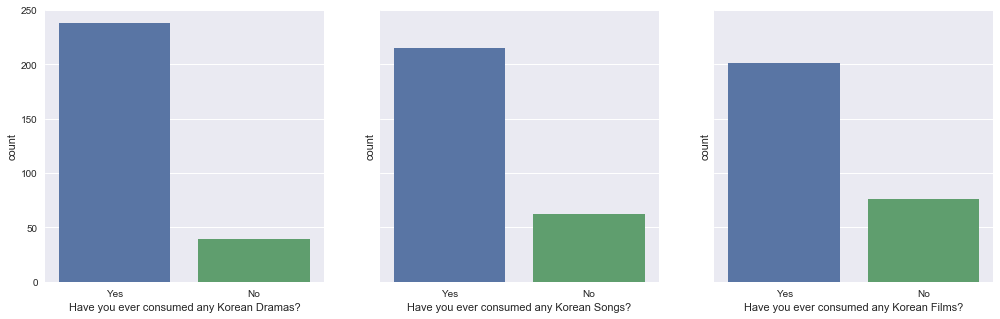

In [18]:
sns.set(style="darkgrid");
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(17, 5), sharey = True);
sns.countplot(x=data.iloc[:, 3], data=data, ax=ax1);
sns.countplot(x=data.iloc[:, 4], data=data, ax=ax2);
sns.countplot(x=data.iloc[:, 5], data=data, ax=ax3);

##### Korean media products bases on Gender factor 

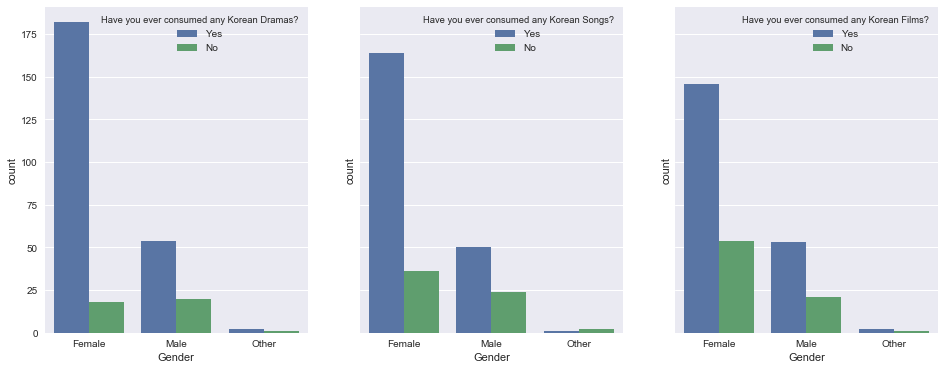

In [19]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 6), sharey=True);
sns.countplot(x=data.iloc[:, 1], hue=data.iloc[:, 3], data=data, ax=ax1);
sns.countplot(x=data.iloc[:, 1], hue=data.iloc[:, 4], data=data, ax=ax2);
sns.countplot(x=data.iloc[:, 1], hue=data.iloc[:, 5], data=data, ax=ax3);

In [20]:
data.groupby(['Have you ever consumed any Korean Dramas?', 'Gender']).size().unstack()

Gender,Female,Male,Other
Have you ever consumed any Korean Dramas?,,,
No,18,20,1
Yes,182,54,2


In [21]:
data.groupby(['Have you ever consumed any Korean Songs?', 'Gender']).size().unstack()

Gender,Female,Male,Other
Have you ever consumed any Korean Songs?,,,
No,36,24,2
Yes,164,50,1


In [22]:
data.groupby(['Have you ever consumed any Korean Films?', 'Gender']).size().unstack()

Gender,Female,Male,Other
Have you ever consumed any Korean Films?,,,
No,54,21,1
Yes,146,53,2


In [23]:
print('____ Korean Dramas ____')
print('Female =', 182/200)
print('Male =', 54/74)
print('____ Korean Songs ____')
print('Female =', 164/200)
print('Male =', 50/74)
print('____ Korean Films ____')
print('Female =', 146/200)
print('Male =', 53/74)

____ Korean Dramas ____
Female = 0.91
Male = 0.7297297297297297
____ Korean Songs ____
Female = 0.82
Male = 0.6756756756756757
____ Korean Films ____
Female = 0.73
Male = 0.7162162162162162


##### Korean media products bases on Residence factor 

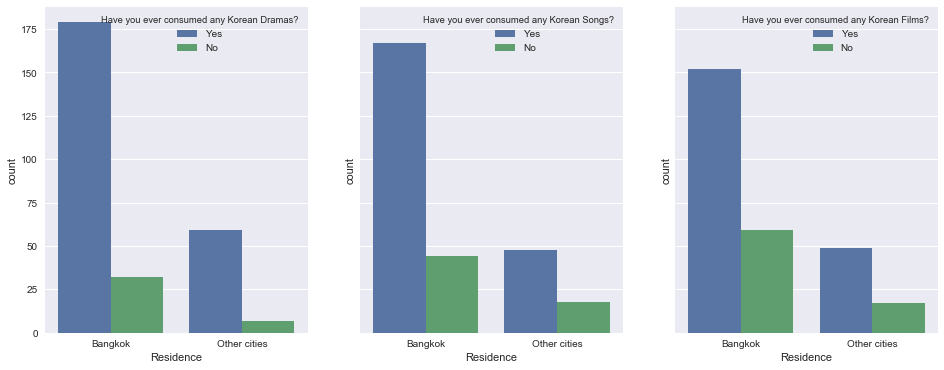

In [24]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 6), sharey=True);
sns.countplot(x=data.iloc[:, 2], hue=data.iloc[:, 3], data=data, ax=ax1);
sns.countplot(x=data.iloc[:, 2], hue=data.iloc[:, 4], data=data, ax=ax2);
sns.countplot(x=data.iloc[:, 2], hue=data.iloc[:, 5], data=data, ax=ax3);

In [25]:
data.groupby(['Have you ever consumed any Korean Dramas?', 'Residence']).size().unstack()

Residence,Bangkok,Other cities
Have you ever consumed any Korean Dramas?,,
No,32,7
Yes,179,59


In [26]:
data.groupby(['Have you ever consumed any Korean Songs?', 'Residence']).size().unstack()

Residence,Bangkok,Other cities
Have you ever consumed any Korean Songs?,,
No,44,18
Yes,167,48


In [27]:
data.groupby(['Have you ever consumed any Korean Films?', 'Residence']).size().unstack()

Residence,Bangkok,Other cities
Have you ever consumed any Korean Films?,,
No,59,17
Yes,152,49


In [28]:
print('____ Korean Dramas ____')
print('BKK =', 179/211)
print('Other =', 59/66)
print('____ Korean Songs ____')
print('BKK =', 167/211)
print('Other =', 48/66)
print('____ Korean Films ____')
print('BKK =', 152/211)
print('Other =', 49/66)

____ Korean Dramas ____
BKK = 0.8483412322274881
Other = 0.8939393939393939
____ Korean Songs ____
BKK = 0.7914691943127962
Other = 0.7272727272727273
____ Korean Films ____
BKK = 0.7203791469194313
Other = 0.7424242424242424


##### Korean media products bases on Age factor 

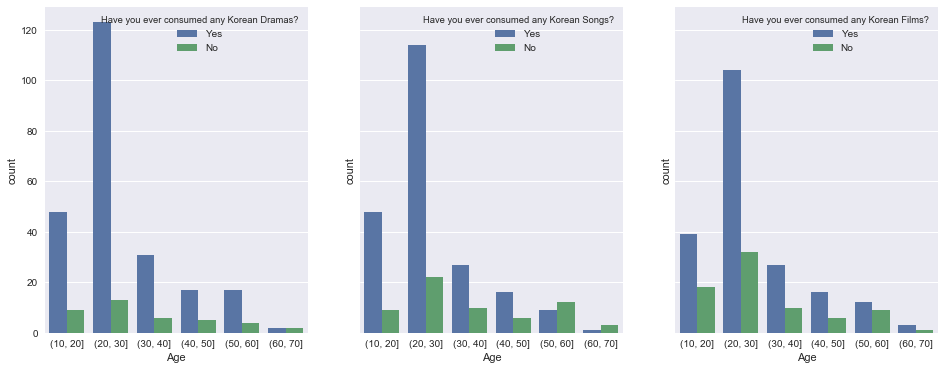

In [29]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 6), sharey=True);
sns.countplot(x=(pd.cut(pd.to_numeric(data.Age), bins=np.arange(10, 71, 10))), hue=data.iloc[:, 3], data=data, ax=ax1);
sns.countplot(x=(pd.cut(pd.to_numeric(data.Age), bins=np.arange(10, 71, 10))), hue=data.iloc[:, 4], data=data, ax=ax2);
sns.countplot(x=(pd.cut(pd.to_numeric(data.Age), bins=np.arange(10, 71, 10))), hue=data.iloc[:, 5], data=data, ax=ax3);

In [30]:
groups = data.groupby(['Have you ever consumed any Korean Dramas?', pd.cut(pd.to_numeric(data.Age), bins=np.arange(10, 71, 10))])
groups.size().unstack()

Age,"(10, 20]","(20, 30]","(30, 40]","(40, 50]","(50, 60]","(60, 70]"
Have you ever consumed any Korean Dramas?,,,,,,
No,9,13,6,5,4,2
Yes,48,123,31,17,17,2


In [31]:
groups = data.groupby(['Have you ever consumed any Korean Songs?', pd.cut(pd.to_numeric(data.Age), bins=np.arange(10, 71, 10))])
groups.size().unstack()

Age,"(10, 20]","(20, 30]","(30, 40]","(40, 50]","(50, 60]","(60, 70]"
Have you ever consumed any Korean Songs?,,,,,,
No,9,22,10,6,12,3
Yes,48,114,27,16,9,1


In [32]:
groups = data.groupby(['Have you ever consumed any Korean Films?', pd.cut(pd.to_numeric(data.Age), bins=np.arange(10, 71, 10))])
groups.size().unstack()

Age,"(10, 20]","(20, 30]","(30, 40]","(40, 50]","(50, 60]","(60, 70]"
Have you ever consumed any Korean Films?,,,,,,
No,18,32,10,6,9,1
Yes,39,104,27,16,12,3


In [33]:
print('____ Korean Dramas ____')
print('Age 11-20 =', 48/57)
print('Age 21-30 =', 123/136)
print('Age 31-40 =', 31/37)
print('Age 41-50 =', 17/22)
print('Age 51-60 =', 17/21)
print('Age 61-70 =', 2/4)
print('____ Korean Songs ____')
print('Age 11-20 =', 48/57)
print('Age 21-30 =', 114/136)
print('Age 31-40 =', 27/37)
print('Age 41-50 =', 16/22)
print('Age 51-60 =', 9/21)
print('Age 61-70 =', 1/4)
print('____ Korean Films ____')
print('Age 11-20 =', 39/57)
print('Age 21-30 =', 104/136)
print('Age 31-40 =', 27/37)
print('Age 41-50 =', 16/22)
print('Age 51-60 =', 12/21)
print('Age 61-70 =', 3/4)

____ Korean Dramas ____
Age 11-20 = 0.8421052631578947
Age 21-30 = 0.9044117647058824
Age 31-40 = 0.8378378378378378
Age 41-50 = 0.7727272727272727
Age 51-60 = 0.8095238095238095
Age 61-70 = 0.5
____ Korean Songs ____
Age 11-20 = 0.8421052631578947
Age 21-30 = 0.8382352941176471
Age 31-40 = 0.7297297297297297
Age 41-50 = 0.7272727272727273
Age 51-60 = 0.42857142857142855
Age 61-70 = 0.25
____ Korean Films ____
Age 11-20 = 0.6842105263157895
Age 21-30 = 0.7647058823529411
Age 31-40 = 0.7297297297297297
Age 41-50 = 0.7272727272727273
Age 51-60 = 0.5714285714285714
Age 61-70 = 0.75


### Summary
##### As you see in the first graph, most of Thai people has ever consumed Korean media products.
- **Female (91%)** is the most effective with **Korean Dramas**
- **11-20 years old (84.2%)** is the most effective with **Korean Songs**
- **21-30 years old (76.5%)** is the most effective with **Korean Films**

------------

> ### 2. Reasons why Thai people like Korean media products

In [34]:
for i in range (8, 14) :
    data.iloc[:, i][data.iloc[:, i] == 'Strongly agree'] = 5
    data.iloc[:, i][data.iloc[:, i] == 'Agree'] = 4
    data.iloc[:, i][data.iloc[:, i] == 'Neither disagree nor agree'] = 3
    data.iloc[:, i][data.iloc[:, i] == 'Disagree'] = 2
    data.iloc[:, i][data.iloc[:, i] == 'Strongly disagree'] = 1

In [35]:
data.head(4)

,Age,Gender,Residence,Have you ever consumed any Korean Dramas?,Have you ever consumed any Korean Songs?,Have you ever consumed any Korean Films?,Do you enjoy Korean media products?,How often do you consume Korean media products in a typical week?,Enjoy Korean media products because I like the products,Enjoy Korean media products because the products are popular among the peers,Enjoy Korean media products because my friends recommended,Enjoy Korean media products for time-killing purpose,Enjoy Korean media products because I like to learn Korean language,Enjoy Korean media products because I want to know about Korean society and culture,How much are you satisfied with the quality of Korean media products?,"Imagine that you meet a South Korean. In your mind, how is the South Korean?",Have you ever visited South Korea before?,"If YES, do you want to re-visit South Korea again?","If NO, have you ever planned to visit South Korea in the future?"
0,21,Female,Bangkok,Yes,Yes,Yes,Yes,Everyday ทุกวัน,4,4,4,4,4,3,Satisfied,Just a person,Yes,Yes อยาก,NaN
1,54,Female,Bangkok,Yes,Yes,Yes,Yes,One day per week 1 วันต่อสัปดาห์,4,4,4,2,2,3,Satisfied,Just a person,Yes,Yes อยาก,Yes อยาก
2,22,Female,Bangkok,Yes,Yes,Yes,Yes,Everyday ทุกวัน,3,3,3,3,3,3,Neither satisfied nor dissatisfied,Just a person,Yes,Yes อยาก,Yes อยาก
3,19,Female,Other cities,Yes,Yes,Yes,Yes,Three days per week 3 วันต่อสัปดาห์,4,3,3,4,4,4,Satisfied,Good person,Yes,Yes อยาก,Yes อยาก


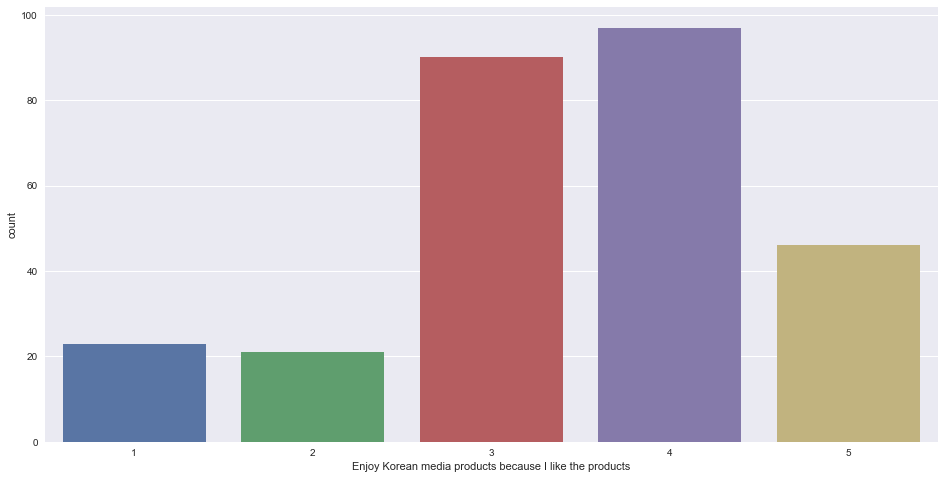

In [47]:
f, ax = plt.subplots(figsize=(16, 8));
sns.countplot(x=data.iloc[:, 8], data=data);

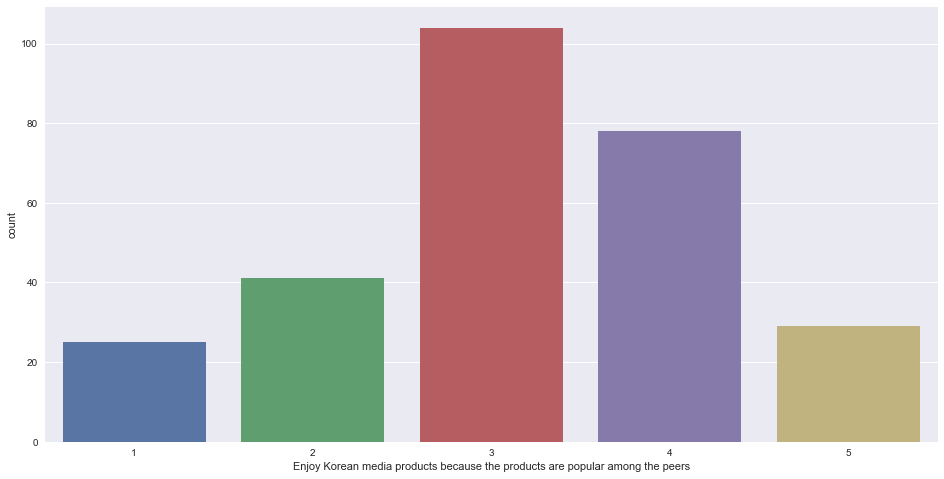

In [37]:
f, ax = plt.subplots(figsize=(16, 8));
sns.countplot(x=data.iloc[:, 9], data=data);

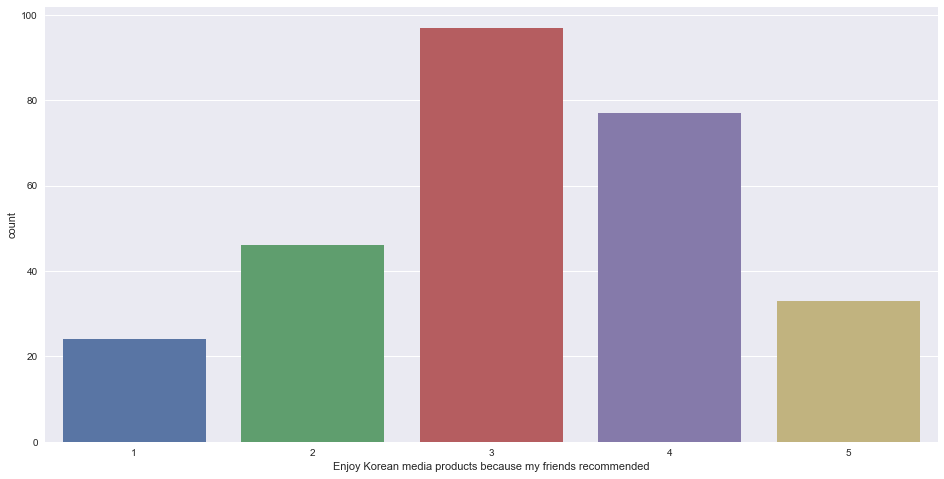

In [38]:
f, ax = plt.subplots(figsize=(16, 8));
sns.countplot(x=data.iloc[:, 10], data=data);

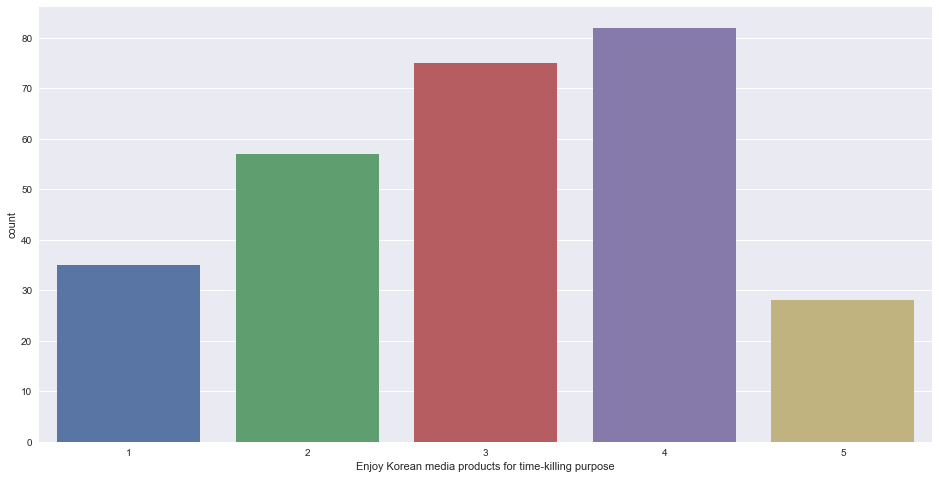

In [39]:
f, ax = plt.subplots(figsize=(16, 8));
sns.countplot(x=data.iloc[:, 11], data=data);

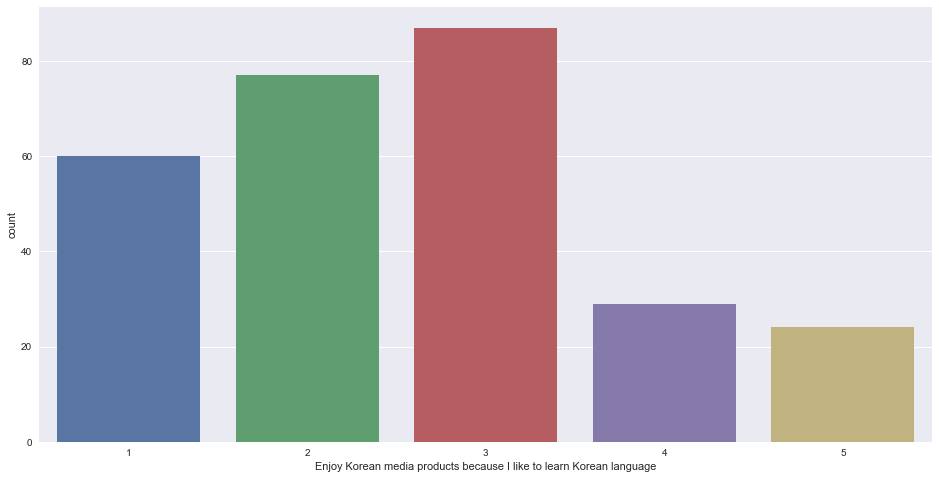

In [40]:
f, ax = plt.subplots(figsize=(16, 8));
sns.countplot(x=data.iloc[:, 12], data=data);

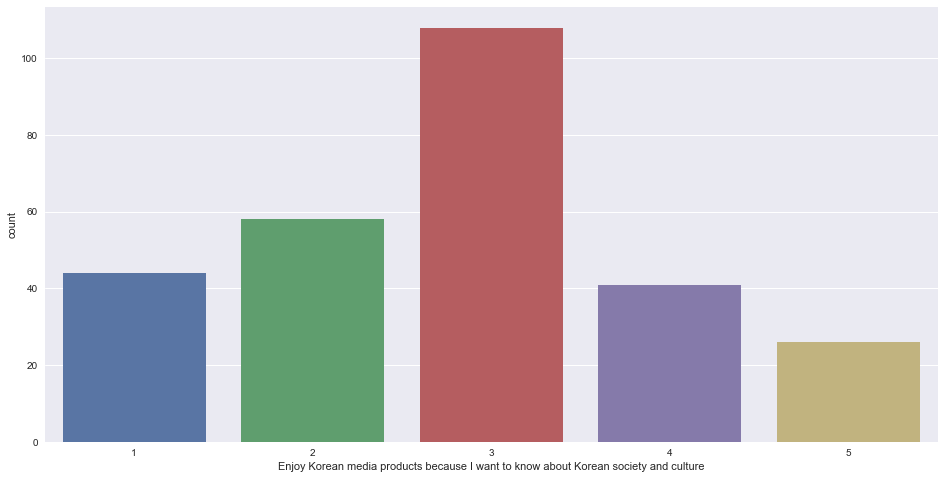

In [41]:
f, ax = plt.subplots(figsize=(16, 8));
sns.countplot(x=data.iloc[:, 13], data=data);

In [52]:
print('Enjoy Korean media products because I like the products =', data.iloc[:, 8].mean())
print('Enjoy Korean media products because the products are popular among the peers =', data.iloc[:, 9].mean())
print('Enjoy Korean media products because my friends recommended =', data.iloc[:, 10].mean())
print('Enjoy Korean media products for time-killing purpose =', data.iloc[:, 11].mean())
print('Enjoy Korean media products because I like to learn Korean language =', data.iloc[:, 12].mean())
print('Enjoy Korean media products because I want to know about Korean society and culture =', data.iloc[:, 13].mean())

Enjoy Korean media products because I like the products = 3.44043321299639
Enjoy Korean media products because the products are popular among the peers = 3.1624548736462095
Enjoy Korean media products because my friends recommended = 3.1768953068592056
Enjoy Korean media products for time-killing purpose = 3.03971119133574
Enjoy Korean media products because I like to learn Korean language = 2.5667870036101084
Enjoy Korean media products because I want to know about Korean society and culture = 2.808664259927798
